#### Evaluation - Comparing Our Models 

The purpose of this notebook is to compare how our models performed across genre and model architecture.\
 This notebook should be run as-is, as it does not have customizable parameters.

In [191]:
# imports 
import matplotlib.pyplot as plt
import numpy as np
import nltk
import syllables
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer
import math
from textblob import TextBlob as tb

In [192]:
# constants - filepaths to txt files with sequences generated by our models 
NGRAM_COUNTRY_SEQS_PATH = "generated_txts/ngram_country.txt"
NGRAM_METAL_SEQS_PATH = "generated_txts/ngram_metal.txt"

LSTM_COUNTRY_SEQS_PATH = "generated_txts/lstm_country.txt"
LSTM_METAL_SEQS_PATH = "generated_txts/lstm_metal20.txt"

GPT2_COUNTRY_SEQS_PATH = "generated_txts/gpt2_country.txt"
GPT2_METAL_SEQS_PATH = "generated_txts/gpt2_metal.txt"

##### Perplexity Across Models and Genres on Test Dataset 

In [193]:
# created with reference to matplotlib documentation https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
def create_grouped_barchart(country_data: tuple, metal_data: tuple, title: str, ylabel: str):
    """ 
    Creates a grouped bar chart comparing the Ngram, RNN and GPT2 models across the country and heavy metal genres.
    Will create two bargraphs for each type of model: one for country, another for heavy metal
    
    Args:
        country_data (tuple): A tuple of numbers in the format (Ngram metric, RNN metric, GPT2 metric) for the country genre
        metal_data (tuple): A tuple of numbers in the format (Ngram metric, RNN metric, GPT2 metric) for the heavy metal genre
        title (str): title for the barchart
        ylabel (str): y-axis label for the barchart 
    """
    models = ("N-Gram", "RNN with LSTMs", "Fine-tuned GPT-2")
    genres = {
        'Country': country_data,
        'Heavy Metal': metal_data,
    }

    x = np.arange(len(models))  # label locations
    width = 0.25  # the width of the bars
    multiplier = .5

    fig, ax = plt.subplots(layout='constrained')

    for genre, value in genres.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, value, width, label=genre)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width, models)
    ax.legend(loc='upper left', ncols=3)

    # chatgpt code to add more whitespace above the tallest bar
    max_height = max(max(value) for value in genres.values())
    additional_space = (max_height * 20) / 100
    ax.set_ylim(top=max_height + additional_space)

    plt.show()

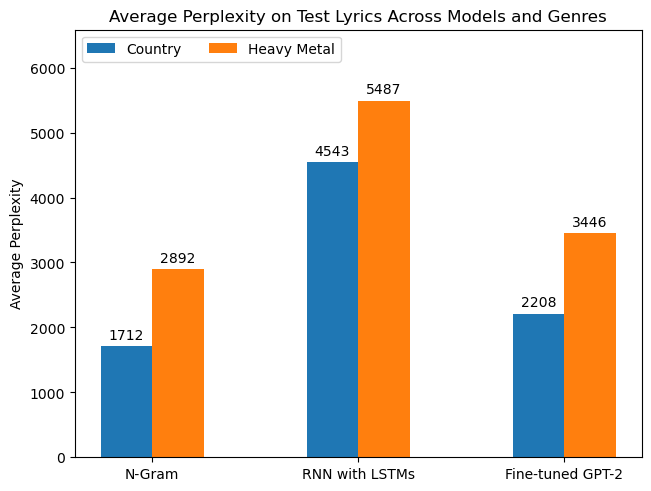

In [194]:
# copy and paste in mean perplexities on test data calculated for each model
country_perplexity = (1712, 4543, 2208)
metal_perplexity = (2892, 5487, 3446)
create_grouped_barchart(country_perplexity, metal_perplexity, 'Average Perplexity on Test Lyrics Across Models and Genres', 'Average Perplexity')

#### Assessing the Generated Sequences 

In [195]:
def read_lines(filepath: str) -> list:
    """
    Reads from the provided filepath and produces a list of strings, 
    each element in the list corresponding to a line in the txt file.
    """   
    lines = []

    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Remove trailing newline characters from each line
    lines = [line.strip() for line in lines]

    return lines 

In [196]:
# sequences generated by our models
ngram_country_seqs = read_lines(NGRAM_COUNTRY_SEQS_PATH)
ngram_metal_seqs = read_lines(NGRAM_METAL_SEQS_PATH)

lstm_country_seqs = read_lines(LSTM_COUNTRY_SEQS_PATH)
lstm_metal_seqs = read_lines(LSTM_METAL_SEQS_PATH)

gpt2_country_seqs = read_lines(GPT2_COUNTRY_SEQS_PATH)
gpt2_metal_seqs = read_lines(GPT2_METAL_SEQS_PATH)

##### Sample Sequences 

In [197]:
print("N-Gram Model, Country:")
print("\n".join(ngram_country_seqs[:10]))

N-Gram Model, Country:
i wind up is where the ocean
we do this every night
there 's ever found you
,  401
on a pocket watch , stole a hundred proof , your , i just got honest ?
and that sort of thing
like me ?
but i 'm gon na take it on your heels on the river
well lay it all together , forever
not knowing if you ever have you ever could 've been down and love was burning like a new song


In [198]:
print("N-Gram Model, Heavy Metal:")
print("\n".join(ngram_metal_seqs[:10]))

N-Gram Model, Heavy Metal:
as i lay my sword to whirl and slaughter
unjustifiable existence
just leave me alone ,
that you require
i watched from the start
some run screaming
it 's eastmann time ''
with the guts
that 's how it goes !
slaughtering my dreams ; they 're  through your eyes a picture


In [199]:
print("RNN + LSTMs Model, Country:")
print("\n".join(lstm_country_seqs[:15]))

RNN + LSTMs Model, Country:
my heart
oh
is my again that do so much
but honey is my head '' my  ' .
just you baby still , ''
ya do the love you
oh
right right right high again
oh , oh
still we can take and year
now i say , real

oh oh is is fire ''
oh oh
oh


In [200]:
print("RNN + LSTMs Model, Heavy Metal:")
print("\n".join(lstm_metal_seqs[:15]))

RNN + LSTMs Model, Heavy Metal:
for me
this feels ?
now
right )

)
to be
it , this time for me ?
we do n't fall still
we meet your life ?

now
pain is ) i saw the day ?
make a higher runaway ? )
die ) ? ) effect around life ? ( like called high give its runaway to ?


In [201]:
print("GPT2 Model, Country:")
print("\n".join(gpt2_country_seqs[:10]))

GPT2 Model, Country:

you  been  just  a  different

,  the  man  that  i  could  get  back
to  make  it  together ,  take  a  lot  of
us  the  things  that  said ,  we 're  right
:  the  music
just  where  the  way  in  the  day
,  the  love  is  gone
the  angels  can  make  a  big  wind


In [202]:
print("GPT2 Model, Heavy Metal:")
print("\n".join(gpt2_metal_seqs[:10]))

GPT2 Model, Heavy Metal:
to  kill  a  demon from  your  breath,
i  see ,  how  we  all  all
the  sign
to  destroy  my  soul
at  glory
to  kill  me  for  the  same  side
now !
to  kill  this  one  and  i 'm
,  all  my  pain
,  not ,  so  nice ,


##### Average Line Length

In [203]:
def avg_tokens_per_line(lines: list):
    """ 
    Computes the average number of tokens per line in the given list of lines 

    Args:
        lines (list): list of strings, where each string is a lyric line 

    Returns:
        Average number of tokens in the lines 
    """
    num_tokens = [len(nltk.word_tokenize(line)) for line in lines]
    return np.mean(num_tokens)

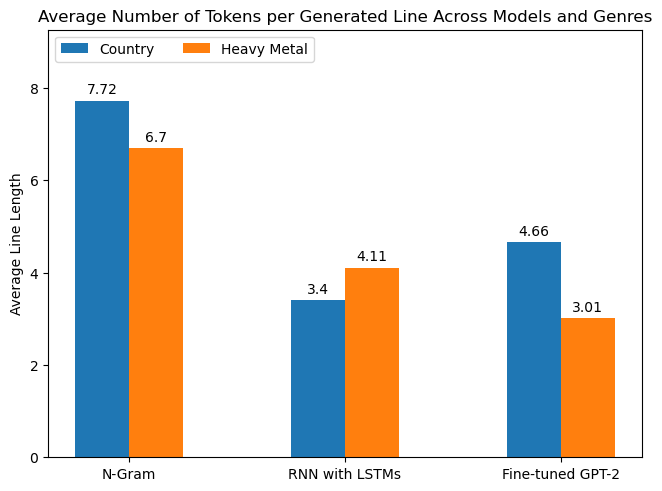

In [204]:
country_line_lengths = (avg_tokens_per_line(ngram_country_seqs), avg_tokens_per_line(lstm_country_seqs), avg_tokens_per_line(gpt2_country_seqs))
metal_line_lengths = (avg_tokens_per_line(ngram_metal_seqs), avg_tokens_per_line(lstm_metal_seqs), avg_tokens_per_line(gpt2_metal_seqs))
create_grouped_barchart(country_line_lengths, metal_line_lengths, 'Average Number of Tokens per Generated Line Across Models and Genres', 'Average Line Length of 100 Generated Lines')

##### Average Syllables per Line 

In [205]:
def avg_syllables_per_line(lines: list):
    """ 
    Computes the average number of syllables per line in the given list of lines 

    Args:
        lines (list): list of strings, where each string is a lyric line 

    Returns:
        Average number of syllables in the lines 
    """
    num_syllables = [syllables.estimate(line) for line in lines]
    return np.mean(num_syllables)

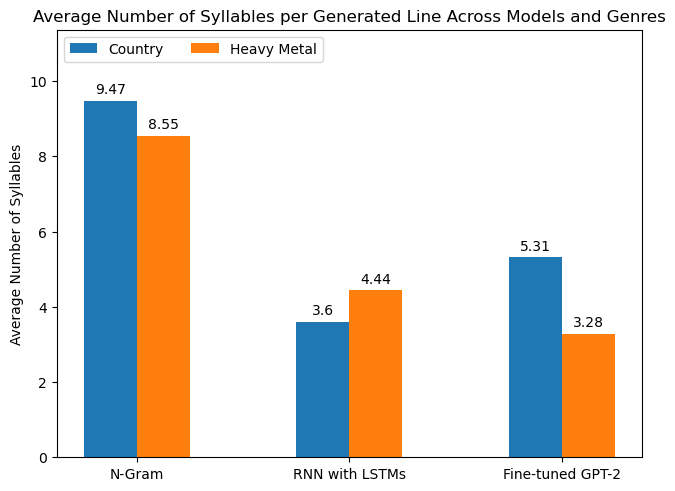

In [206]:
country_num_syllables = (avg_syllables_per_line(ngram_country_seqs), avg_syllables_per_line(lstm_country_seqs), avg_syllables_per_line(gpt2_country_seqs))
metal_num_syllables = (avg_syllables_per_line(ngram_metal_seqs), avg_syllables_per_line(lstm_metal_seqs), avg_syllables_per_line(gpt2_metal_seqs),)
create_grouped_barchart(country_num_syllables, metal_num_syllables, 'Average Number of Syllables per Generated Line Across Models and Genres', 'Average Syllable Count of 100 Generated Lines')

##### Most Characteristic Tokens for Each Model

The purpose of this metric is to see if certain genres and models tend to produce particular words more often than others.
(What particular words have the models learned are important for the genre?)

In [207]:
# Adapted from the chat-gpt response to the prompt - "how to use TfidfVectorizer to find unique and characteristic words in a class"

# explanation why this works poorly: https://stackoverflow.com/questions/70727739/tfidfvectorizer-seems-to-be-giving-incorrect-results


# the number of top characteristic words to return
k = 10

# considering our different sources of generated text to be our documents  
documents = [ngram_country_seqs, ngram_metal_seqs ,lstm_country_seqs, lstm_metal_seqs, gpt2_country_seqs, gpt2_metal_seqs]
document_labels = ["N-Gram Country", "N-Gram Heavy Metal", "RNN + LSTM Country", "RNN + LSTM Heavy Metal", "GPT2 Country", "GPT2 Heavy Metal"]

# represent each document with a list string containing all sequences 
documents_as_strings = [' '.join(doc) for doc in documents]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents_as_strings)

# Get feature names (words) and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()

for i, document in enumerate(documents):
    # Calculate the TF-IDF score for each word in the document
    tfidf_scores = tfidf_matrix[i].toarray().flatten()

    # Get indices of top k words with highest TF-IDF scores
    top_n_indices = tfidf_scores.argsort()[-k:][::-1]  

    # Map indices to feature names
    top_n_words = [feature_names[i] for i in top_n_indices]

    # Print characteristic words for the document
    print(f"{document_labels[i]} characteristic words: {', '.join(top_n_words)}")


N-Gram Country characteristic words: the, you, and, to, on, me, that, it, in, but
N-Gram Heavy Metal characteristic words: the, to, you, in, my, of, and, it, is, will
RNN + LSTM Country characteristic words: oh, just, still, is, the, my, and, again, that, we
RNN + LSTM Heavy Metal characteristic words: around, fall, again, to, buy, the, time, it, this, pain
GPT2 Country characteristic words: the, in, to, man, me, just, and, of, for, we
GPT2 Heavy Metal characteristic words: the, to, for, pain, it, kill, your, me, in, my


In [208]:
# from https://stevenloria.com/tf-idf/

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)


documents = [ngram_country_seqs, lstm_country_seqs, gpt2_country_seqs, ngram_metal_seqs, lstm_metal_seqs, gpt2_metal_seqs]
document_labels = ["N-Gram Country",  "RNN + LSTM Country", "GPT2 Country", "N-Gram Heavy Metal", "RNN + LSTM Heavy Metal", "GPT2 Heavy Metal"]

# represent each document with a list string containing all sequences 
documents_as_blobs = [tb(' '.join(doc)) for doc in documents]

bloblist = documents_as_blobs
for i, blob in enumerate(bloblist):
    print("Top words for", document_labels[i], "model")
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        print("\t{}: TF-IDF {}".format(word, round(score, 5)))
    print()

Top words for N-Gram Country model
	got: TF-IDF 0.00473
	down: TF-IDF 0.00473
	call: TF-IDF 0.0045
	need: TF-IDF 0.0045
	n't: TF-IDF 0.00387

Top words for RNN + LSTM Country model
	oh: TF-IDF 0.17687
	honey: TF-IDF 0.00758
	real: TF-IDF 0.00758
	whiskey: TF-IDF 0.00758
	heart: TF-IDF 0.00717

Top words for GPT2 Country model
	man: TF-IDF 0.01272
	things: TF-IDF 0.00763
	lose: TF-IDF 0.00509
	happy: TF-IDF 0.00509
	small: TF-IDF 0.00509

Top words for N-Gram Heavy Metal model
	far: TF-IDF 0.0053
	beyond: TF-IDF 0.0053
	try: TF-IDF 0.0053
	inside: TF-IDF 0.0053
	cunty: TF-IDF 0.00446

Top words for RNN + LSTM Heavy Metal model
	around: TF-IDF 0.02296
	buy: TF-IDF 0.01312
	fall: TF-IDF 0.01241
	fake: TF-IDF 0.00984
	pain: TF-IDF 0.00828

Top words for GPT2 Heavy Metal model
	kill: TF-IDF 0.01313
	–: TF-IDF 0.01313
	pain: TF-IDF 0.01105
	breath: TF-IDF 0.00875
	mind: TF-IDF 0.00875

